# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
cities=pd.read_csv(output_data_file)


cities_df= pd.DataFrame(cities)
cities_df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat= []
lng= []
cities= []

for each_city in cities_df["City"]:
    cities.append(each_city)
    
cities

for each_lat in cities_df["Lat"]:
    lat.append(each_lat)
    
lat

for each_lng in cities_df["Lng"]:
    lng.append(each_lng)
    
lng
    



[39.51,
 57.7,
 -69.36,
 112.04,
 18.42,
 -139.03,
 150.85,
 13.84,
 128.87,
 28.91,
 111.51,
 -73.76,
 -159.78,
 114.09,
 -104.67,
 -73.75,
 121.63,
 -68.31,
 57.76,
 99.18,
 92.31,
 115.35,
 -2.56,
 -35.22,
 -105.12,
 99.52,
 81.7,
 -70.91,
 -134.97,
 147.06,
 18.97,
 120.35,
 -127.42,
 150.17,
 114.02,
 -161.76,
 -90.19,
 5.65,
 33.6,
 -60.77,
 19.24,
 -52.73,
 -114.38,
 24.73,
 -90.35,
 -84.4,
 45.06,
 -74.98,
 26.89,
 123.7,
 -94.76,
 -67.52,
 60.78,
 -109.91,
 -149.33,
 102.47,
 -76.2,
 82.74,
 -15.21,
 117.47,
 -84.36,
 123.37,
 -97.86,
 170.27,
 -45.24,
 166.44,
 80.55,
 81.12,
 -7.87,
 -1.13,
 -46.0,
 -51.19,
 172.79,
 -75.98,
 48.53,
 22.34,
 -59.33,
 134.96,
 17.12,
 83.59,
 174.87,
 138.6,
 59.53,
 -3.53,
 148.16,
 147.14,
 30.79,
 49.05,
 -50.22,
 120.72,
 -70.77,
 -59.05,
 102.25,
 -121.81,
 44.22,
 63.02,
 168.86,
 134.5,
 93.76,
 -60.23,
 131.25,
 -76.48,
 -131.65,
 -159.32,
 11.91,
 120.73,
 -155.08,
 -135.06,
 -12.5,
 10.6,
 -120.46,
 92.75,
 20.04,
 72.93,
 164.28,
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#  api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
query_url= f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# response=requests.get(query_url + str((cities)[1]))
# pprint(response.json())

latitude=[]
longitude=[]
temp=[]
humidity=[]
clouds=[]
wind=[]

for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    latitude.append(response["coord"]["lat"])
    longitude.append(response["coord"]["lon"])
    temp.append(response["main"]["temp"])
    humidity.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    wind.append(response["wind"]["speed"])
    print(f"{each_city} completed")
    


ostrovnoy completed
mahebourg completed
qaanaaq completed
zhuhai completed
cape town completed
atuona completed
flinders completed
opuwo completed
tiksi completed
pushkinskiye gory completed
aykhal completed
castro completed
avarua completed
saskylakh completed
constitucion completed
albany completed
vilyuysk completed
ushuaia completed
bambous virieux completed
kodinsk completed
teknaf completed
busselton completed
ambon completed
maragogi completed
fallon completed
kantang completed
colonelganj completed
punta arenas completed
rikitea completed
new norfolk completed
gobabis completed
qingdao completed
port hardy completed
arman completed
mamakan completed
bethel completed
clinton completed
varhaug completed
ayan completed
mayor pablo lagerenza completed
hermanus completed
torbay completed
yellowknife completed
kruisfontein completed
puerto ayora completed
rosita completed
beloha completed
port elizabeth completed
port alfred completed
garchitorena completed
kodiak completed
mar del p

arroyo completed
hastings completed
okhotsk completed
maniitsoq completed
meulaboh completed
cartagena del chaira completed
macau completed
svodin completed
victoria completed
dong xoai completed
zaysan completed
sioux lookout completed
waipawa completed
vila do maio completed
brae completed
russkiy aktash completed
kokstad completed
lucapa completed
birjand completed
ingham completed
henties bay completed
tilichiki completed
doha completed
makakilo city completed
lorengau completed
anan completed
synya completed
thanatpin completed
altagracia de orituco completed
anqing completed
nome completed
lahaina completed
hereford completed
san ramon de la nueva oran completed
manuk mangkaw completed
prainha completed
pacific grove completed
tam ky completed
atasu completed
seshcha completed
norilsk completed
los teques completed
san cristobal completed
san ramon completed
horta completed
poum completed
sawtell completed
seoul completed
plettenberg bay completed
oranjestad completed
belmonte co

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe

weather_df= pd.DataFrame({
    "City": cities,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Clouds": clouds,
    "Wind Speed": wind
})

weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
0,ostrovnoy,68.05,39.51,50.47,93,63,9.06
1,mahebourg,-20.41,57.70,71.60,88,75,5.82
2,qaanaaq,77.48,-69.36,41.09,66,1,1.83
3,zhuhai,22.28,113.57,81.61,88,40,21.92
4,cape town,-33.93,18.42,53.91,93,0,6.93


In [5]:
# export data

weather_df.to_csv(r"C:\Users\chris\Documents\DU Bootcamp\Class_Materials\06-Python-APIs\weather.csv")
weather_df.to_csv(r"C:\Users\chris\Documents\python\Python_API_challenge\Python_API_Challenge\weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
high_humidity=weather_df.loc[weather_df["Humidity"]>100, :]
hh=len(high_humidity)
print(f"There are {hh} cities in this data set with humidity above 100%")

There are 0 cities in this data set with humidity above 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

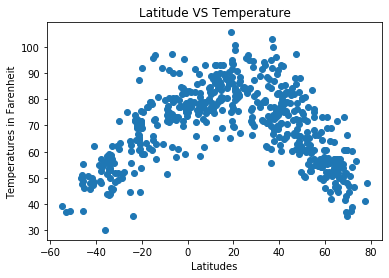

In general, the closer to the equator, the higher the temperature


In [7]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.title("Latitude VS Temperature")
plt.xlabel("Latitudes")
plt.ylabel("Temperatures in Farenheit")
plt.show()
print("In general, the closer to the equator, the higher the temperature")

## Latitude vs. Humidity Plot

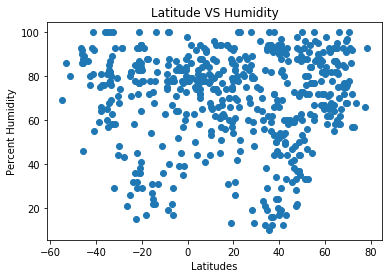

Humidity does not seem to correlate too strongly to latitude.  However, around -20, and 40 there are some cities with the lowest humidity on the plot.


In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.title("Latitude VS Humidity")
plt.xlabel("Latitudes")
plt.ylabel("Percent Humidity")
plt.show()
print("Humidity does not seem to correlate too strongly to latitude.  However, around -20, and 40 there are some cities with the lowest humidity on the plot.")

## Latitude vs. Cloudiness Plot

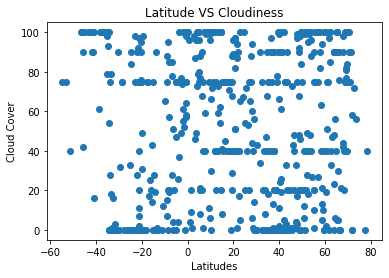

There are not enough clustered data points to conclude that cloud cover is affected by latitude.


In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Clouds"])
plt.title("Latitude VS Cloudiness")
plt.xlabel("Latitudes")
plt.ylabel("Cloud Cover")
plt.show()
print("There are not enough clustered data points to conclude that cloud cover is affected by latitude.")

## Latitude vs. Wind Speed Plot

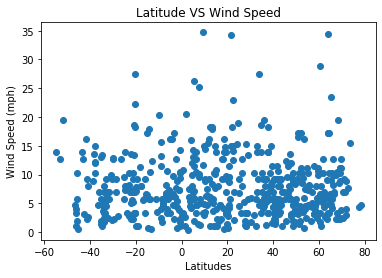

There are a few cities experiencing winds above 25 mph, most of which are in the Northern Hemisphere


In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.title("Latitude VS Wind Speed")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("There are a few cities experiencing winds above 25 mph, most of which are in the Northern Hemisphere")

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north=weather_df.loc[weather_df["Latitude"]>=0, :]
north=pd.DataFrame(north)
north.head()

south=weather_df.loc[weather_df["Latitude"]<0, :]
south=pd.DataFrame(south)
south.head()

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
1,mahebourg,-20.41,57.70,69.80,94,75,3.36
4,cape town,-33.93,18.42,61.45,82,0,8.05
5,atuona,-9.80,-139.03,79.52,63,65,20.40
6,flinders,-34.58,150.86,44.42,85,54,1.01
7,opuwo,-18.06,13.84,78.78,17,0,11.32


In [16]:
# make API calls for northern 

northern_cities=[]
northern_latitudes=[]
northern_longitudes=[]
northern_temps=[]
northern_humidity=[]
northern_clouds=[]
northern_wind=[]


for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    if response["coord"]["lat"]>=0:
        northern_cities.append(response["name"])
        northern_latitudes.append(response["coord"]["lat"])
        northern_longitudes.append(response["coord"]["lon"])
        northern_temps.append(response["main"]["temp_max"])
        northern_humidity.append(response["main"]["humidity"])
        northern_clouds.append(response["clouds"]["all"])
        northern_wind.append(response["wind"]["speed"])
        

northern_df= pd.DataFrame({
    "City": northern_cities,
    "Latitude": northern_latitudes,
    "Longitude": northern_longitudes,
    "Max Temperature": northern_temps,
    "Humidity": northern_humidity,
    "Clouds": northern_clouds,
    "Wind Speed": northern_wind
})

northern_df.head()
    

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed
0,Ostrovnoy,68.05,39.51,53.04,85,44,10.42
1,Qaanaaq,77.48,-69.36,40.59,66,0,4.36
2,Zhuhai,22.28,113.57,81.00,100,40,14.99
3,Tiksi,71.69,128.87,38.08,92,58,2.98
4,Pushkinskiye Gory,57.02,28.91,59.65,95,100,5.06


In [17]:
# make API calls for southern hemisphere

s_cities=[]
s_latitudes=[]
s_longitudes=[]
s_temps=[]
s_humidity=[]
s_clouds=[]
s_wind=[]


for each_city in cities:
    response=requests.get(query_url + str(each_city)).json()
    if response["coord"]["lat"]<0:
        s_cities.append(response["name"])
        s_latitudes.append(response["coord"]["lat"])
        s_longitudes.append(response["coord"]["lon"])
        s_temps.append(response["main"]["temp_max"])
        s_humidity.append(response["main"]["humidity"])
        s_clouds.append(response["clouds"]["all"])
        s_wind.append(response["wind"]["speed"])
        

southern_df= pd.DataFrame({
    "City": s_cities,
    "Latitude": s_latitudes,
    "Longitude": s_longitudes,
    "Max Temperature": s_temps,
    "Humidity": s_humidity,
    "Clouds": s_clouds,
    "Wind Speed": s_wind
})

southern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind Speed
0,Mahébourg,-20.41,57.70,69.80,94,75,3.36
1,Cape Town,-33.93,18.42,64.00,82,0,8.05
2,Atuona,-9.80,-139.03,79.52,63,65,20.40
3,Flinders,-34.58,150.86,45.00,85,54,1.01
4,Opuwo,-18.06,13.84,78.78,17,0,11.32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

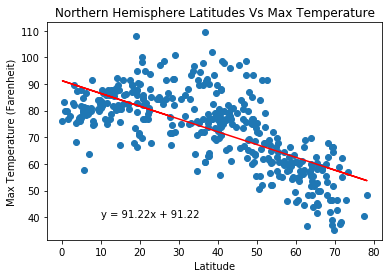

The linear regression line reinforces what we said earlier; The farther away from the equator, the lower the temperature


In [22]:
from scipy.stats import linregress


plt.scatter(northern_df["Latitude"], northern_df["Max Temperature"])


x_values=northern_df["Latitude"]
y_values=northern_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (10, 40))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitudes Vs Max Temperature")
plt.savefig("northern_temps.png")
plt.show()

print("The linear regression line reinforces what we said earlier; The farther away from the equator, the lower the temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

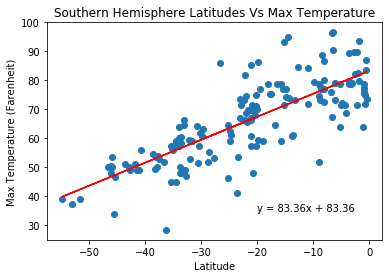

This again shows that the temperature gets warmer the closer you get to the equator


In [23]:
plt.scatter(southern_df["Latitude"], southern_df["Max Temperature"])


x_values=southern_df["Latitude"]
y_values=southern_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-20, 35))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitudes Vs Max Temperature")
plt.savefig("southern_temps.png")
plt.show()

print("This again shows that the temperature gets warmer the closer you get to the equator")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

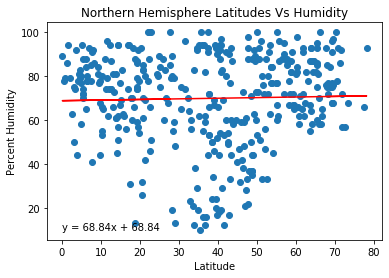

The linear regression line shows no significant change in humidity based on latitude


In [25]:
plt.scatter(northern_df["Latitude"], northern_df["Humidity"])


x_values=northern_df["Latitude"]
y_values=northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (0, 10))
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("Northern Hemisphere Latitudes Vs Humidity")
plt.savefig("northern_humidity.png")
plt.show()

print("The linear regression line shows no significant change in humidity based on latitude")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

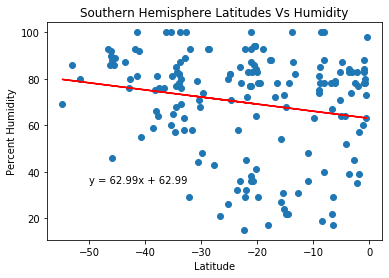

On this particular day, the linear regression shows a moderate decrease in humidity as you approach the equator


In [27]:
plt.scatter(southern_df["Latitude"], southern_df["Humidity"])


x_values=southern_df["Latitude"]
y_values=southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 35))
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.title("Southern Hemisphere Latitudes Vs Humidity")
plt.savefig("southern_humidity.png")
plt.show()

print("On this particular day, the linear regression shows a moderate decrease in humidity as you approach the equator")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

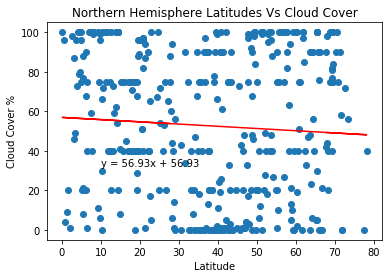

There is a slight decrease in cloud cover as you travel away from the equator


In [29]:
plt.scatter(northern_df["Latitude"], northern_df["Clouds"])


x_values=northern_df["Latitude"]
y_values=northern_df["Clouds"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (10, 32))
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover %")
plt.title("Northern Hemisphere Latitudes Vs Cloud Cover")
plt.savefig("northern_clouds.png")
plt.show()

print("There is a slight decrease in cloud cover as you travel away from the equator")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

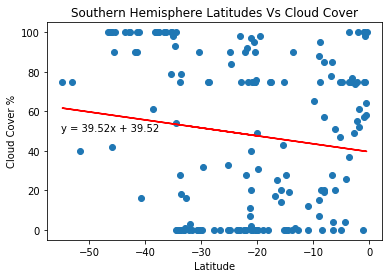

In the Southern Hemisphere, cloud cover decreases slightly as you approach the equator


In [31]:
plt.scatter(southern_df["Latitude"], southern_df["Clouds"])


x_values=southern_df["Latitude"]
y_values=southern_df["Clouds"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55, 50))
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover %")
plt.title("Southern Hemisphere Latitudes Vs Cloud Cover")
plt.savefig("southern_clouds.png")
plt.show()

print("In the Southern Hemisphere, cloud cover decreases slightly as you approach the equator")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

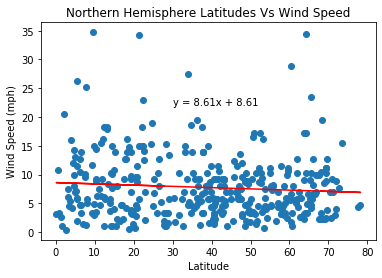

There is no significant correlation between wind speed and latitude in the Northern Hemisphere


In [33]:
plt.scatter(northern_df["Latitude"], northern_df["Wind Speed"])


x_values=northern_df["Latitude"]
y_values=northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (30, 22))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Latitudes Vs Wind Speed")
plt.savefig("northern_wind.png")
plt.show()

print("There is no significant correlation between wind speed and latitude in the Northern Hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

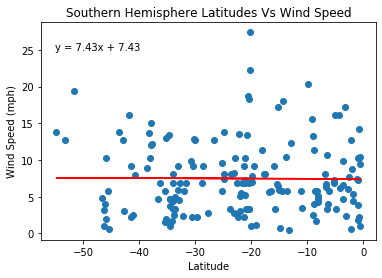

There is no significant correlation between wind speed and latitude in the Southern Hemisphere


In [36]:
plt.scatter(southern_df["Latitude"], southern_df["Wind Speed"])


x_values=southern_df["Latitude"]
y_values=southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y = " + str(round(intercept, 2)) + "x + " +str(round(intercept, 2))
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55, 25))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Latitudes Vs Wind Speed")
plt.savefig("southern_wind.png")
plt.show()

print("There is no significant correlation between wind speed and latitude in the Southern Hemisphere")